In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from __future__ import print_function

In [2]:
np.random.seed(2)
print(np.random.randn(3))

[-0.41675785 -0.05626683 -2.1361961 ]


In [3]:
means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10

In [4]:
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

print(X0, X1)

[[1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798]] [[4.57015242 4.26067601 4.91159998 4.13691056 3.42874719 3.86080283
  3.20796439 4.42210467 3.79892628 4.0322119 ]
 [2.41862663 1.97550802 2.27601231 2.01658463 0.33988602 2.02647066
  1.43240175 2.42210903 1.65872115 1.19677636]]


In [5]:
X = np.concatenate((X0, X1), axis = 1)
print(X)

[[1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619 4.57015242 4.26067601
  4.91159998 4.13691056 3.42874719 3.86080283 3.20796439 4.42210467
  3.79892628 4.0322119 ]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798 2.41862663 1.97550802
  2.27601231 2.01658463 0.33988602 2.02647066 1.43240175 2.42210903
  1.65872115 1.19677636]]


In [6]:
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
print(y)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]


In [7]:
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(X)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.58088898 2.30842598 2.85920935 2.33119493 0.8446075  2.43842562
  2.30235756 1.57972842 2.19183827 2.02084619 4.57015242 4.26067601
  4.91159998 4.13691056 3.42874719 3.86080283 3.20796439 4.42210467
  3.79892628 4.0322119 ]
 [0.77884021 2.53332139 2.38607874 2.57781268 0.86318448 2.67949983
  2.29380214 1.24527036 1.79913648 2.13558798 2.41862663 1.97550802
  2.27601231 2.01658463 0.33988602 2.02647066 1.43240175 2.42210903
  1.65872115 1.19677636]]


In [8]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [9]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [10]:
def perceptron(X, y, w_init):
    w = [w_init]
    d = X.shape[0]
    N = X.shape[1]
    mis_points = []
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + xi*yi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [14]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

print((w, m))

([array([[ 0.57014127],
       [-1.59014501],
       [-0.06352438]]), array([[1.57014127],
       [0.71221255],
       [2.23027776]]), array([[ 0.57014127],
       [-2.71653464],
       [ 1.89039174]]), array([[ 1.57014127],
       [-1.87192714],
       [ 2.75357622]])], [np.int32(6), np.int32(14), np.int32(4)])


In [18]:
from sklearn.svm import SVC

y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 

print(X1, y1)

clf.fit(X1, y1) 

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

[[1.         1.58088898 0.77884021]
 [1.         2.30842598 2.53332139]
 [1.         2.85920935 2.38607874]
 [1.         2.33119493 2.57781268]
 [1.         0.8446075  0.86318448]
 [1.         2.43842562 2.67949983]
 [1.         2.30235756 2.29380214]
 [1.         1.57972842 1.24527036]
 [1.         2.19183827 1.79913648]
 [1.         2.02084619 2.13558798]
 [1.         4.57015242 2.41862663]
 [1.         4.26067601 1.97550802]
 [1.         4.91159998 2.27601231]
 [1.         4.13691056 2.01658463]
 [1.         3.42874719 0.33988602]
 [1.         3.86080283 2.02647066]
 [1.         3.20796439 1.43240175]
 [1.         4.42210467 2.42210903]
 [1.         3.79892628 1.65872115]
 [1.         4.0322119  1.19677636]] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
w =  [[ 4.44089210e-16 -1.80543473e+00  1.43595575e+00]]
b =  [2.73550963]


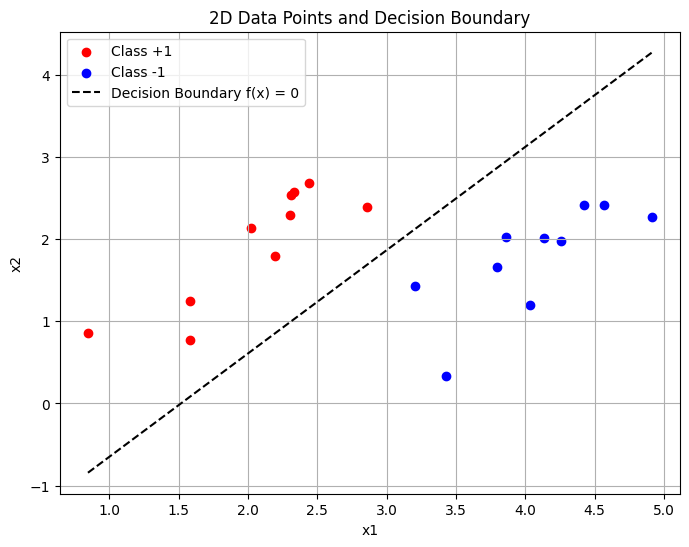

In [13]:
# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[1, :N], X[2, :N], color='red', label="Class +1")
plt.scatter(X[1, N:], X[2, N:], color='blue', label="Class -1")

# Generate decision boundary in 2D
x1_range = np.linspace(min(X[1]), max(X[1]), 100)
x2_boundary = (-w[0][1] / w[0][2]) * x1_range - (b / w[0][2])

# Plot decision boundary
plt.plot(x1_range, x2_boundary, 'k--', label="Decision Boundary f(x) = 0")

# Labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("2D Data Points and Decision Boundary")
plt.legend()
plt.grid()
plt.show()